In [1]:
from collections import defaultdict
res = {"Conductor":defaultdict(int), "Asym":defaultdict(int)}
with open("res.txt", "r") as f:
    for line in f.readlines():
        name, N, t1, t2 = line.split(' ')
        res[name][N] = max(res[name][N], (int(t1)+int(t2))/int(N)) # (int(t1)+int(t2))/int(N)
res

{'Conductor': defaultdict(int,
             {'5': 50.4,
              '6': 130.0,
              '7': 176.28571428571428,
              '8': 261.0,
              '9': 322.22222222222223,
              '10': 645.4}),
 'Asym': defaultdict(int,
             {'10': 40.6,
              '9': 41.77777777777778,
              '8': 38.0,
              '7': 42.285714285714285,
              '6': 39.333333333333336,
              '5': 33.2})}

In [2]:
labels = list(res["Conductor"].keys())
men_means = sorted(list(res["Conductor"].values()))
women_means = sorted(list(res["Asym"].values()))

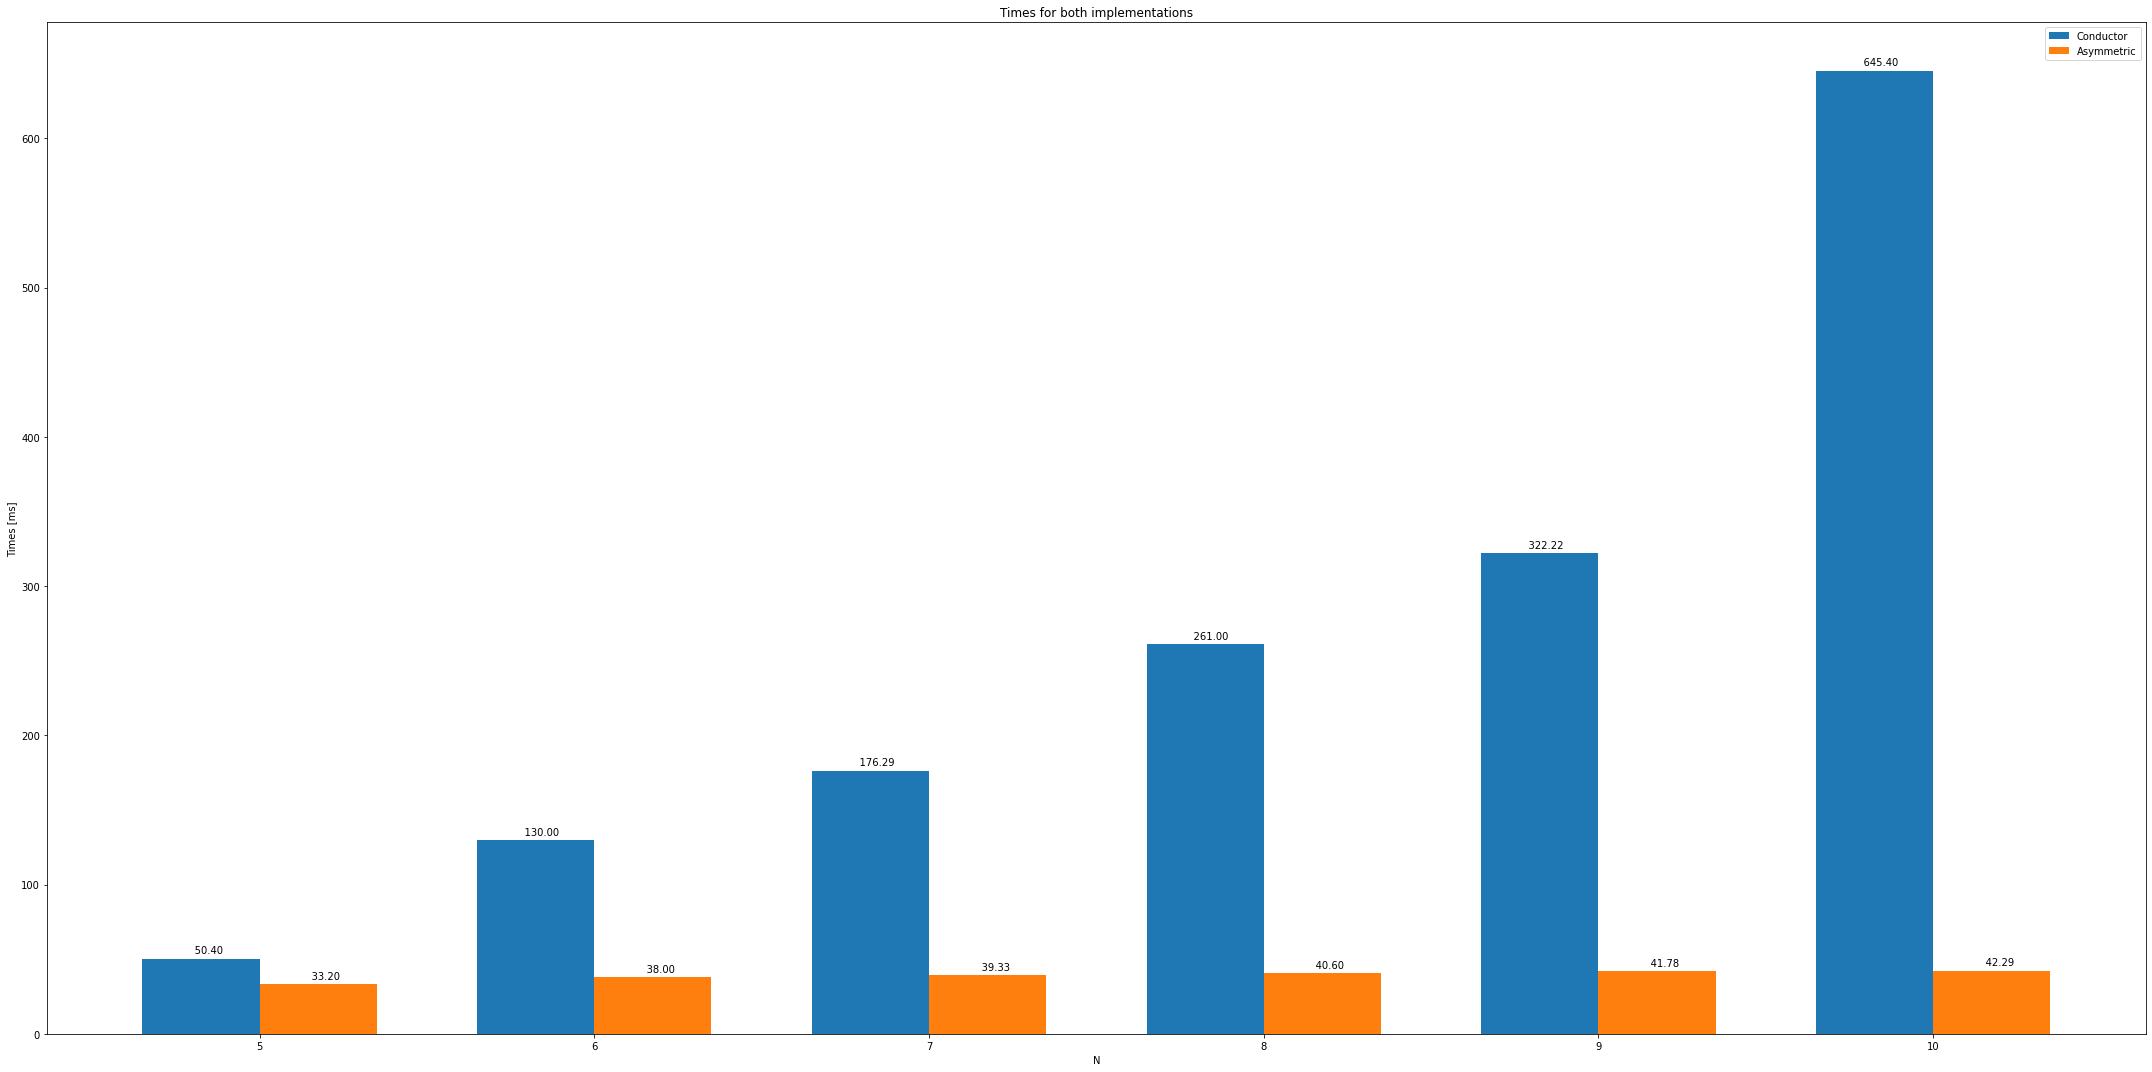

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Conductor')
rects2 = ax.bar(x + width/2, women_means, width, label='Asymmetric')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Times [ms]')
ax.set_xlabel('N')
ax.set_title('Times for both implementations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:10.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


# plt.rcParams['figure.figsize'] = [50, 16/2.54]
plt.rcParams['figure.figsize'] = [25, 12]
plt.show()
